In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
import matplotlib.pyplot as plt

image_index = 3333 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

2


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2006 - acc: 0.9396 - val_loss: 0.0755 - val_acc: 0.9763
Epoch 2/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0840 - acc: 0.9739 - val_loss: 0.0681 - val_acc: 0.9781
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0590 - acc: 0.9817 - val_loss: 0.0522 - val_acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0445 - acc: 0.9857 - val_loss: 0.0601 - val_acc: 0.9816
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0334 - acc: 0.9887 - val_loss: 0.0545 - val_acc: 0.9824
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0293 - acc: 0.9902 - val_loss: 0.0582 - val_acc: 0.9835
Epoch 7/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0571 - val_acc

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 218us/step


[0.060772450016783844, 0.9843]

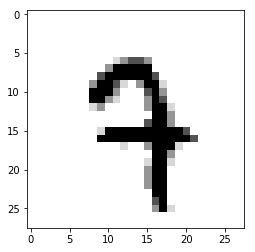

In [24]:
image_index = 3333
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')




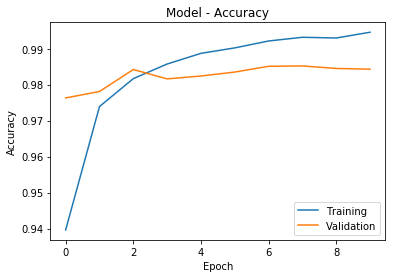

In [8]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

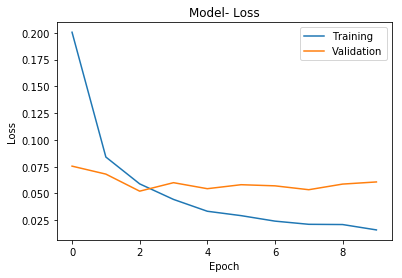

In [11]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()